
# Titanic Dataset Variables

<div align="center">

| Variable     | Description                                                                 | Possible Values                                                                 |
|:------------:|:---------------------------------------------------------------------------:|:-------------------------------------------------------------------------------:|
| PassengerId  | Unique identifier for each passenger                                        | Integer values                                                                  |
| Survived     | Survival indicator                                                          | 0 = No, 1 = Yes                                                                 |
| Pclass       | Passenger class                                                             | 1 = 1st, 2 = 2nd, 3 = 3rd                                                       |
| Name         | Name of the passenger                                                       | String values                                                                   |
| Sex          | Gender of the passenger                                                     | male, female                                                                    |
| Age          | Age of the passenger                                                        | Float values                                                                    |
| SibSp        | Number of siblings/spouses aboard the Titanic                               | Integer values                                                                  |
| Parch        | Number of parents/children aboard the Titanic                               | Integer values                                                                  |
| Ticket       | Ticket number                                                               | String values                                                                   |
| Fare         | Passenger fare                                                              | Float values                                                                    |
| Cabin        | Cabin number                                                                | String values, 'UNK' for unknown                                                |
| Embarked     | Port of embarkation                                                         | C = Cherbourg, Q = Queenstown, S = Southampton                                  |
| alone        | Whether the passenger was alone                                             | True, False                                                                     |
| deck         | Deck level                                                                  | A, B, C, D, E, F, G, UNK                                                        |

</div>

This table provides a comprehensive overview of the variables in the Titanic dataset, their descriptions, and possible values for key categorical variables.


# Import libraries

In [1]:
import numpy as np
import pandas as pd

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

from sklearn.preprocessing import OneHotEncoder

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

warnings.filterwarnings('ignore')



# Import functions

In [2]:
import functions as f

# Data loading

Que visualizaciones podemos hacer??

- Distribucion de la edad
- Distribucion de precios

- Distribucion de: (comparando p ej vivos y muertos)
    - Edad
    - Pclass
    - sexo
    - Fare
    - Embarked


# Exploratory Data Analysis

## Data Cleaning and Preprocessing

In this section, we perform data cleaning and preprocessing tasks on the Titanic dataset. The main steps include:

- **Handling Missing Values**:

    - We impute missing values in the `Age` column by calculating the median age for groups based on `Pclass` and `Sex`.
    - Missing values in the `Cabin` and `deck` columns are replaced with `UNK` (unknown).
    - Missing values in the `Embarked` column are replaced with the mode (most frequent value).

- **Feature Engineering**:

    - We create the column `Group_Age` that cathegorize the passengers according to their age.
    - We create the columns `Surname` and `Title` to later analyse families and positions.
    - We create a new column `n_fam` that represents the total number of family members aboard by summing `SibSp` and `Parch`.
    - We group the individuals into families.
    - We perform one-hot encoding on the `Sex` and `Embarked` columns to convert categorical variables into numerical format.
    - A new binary column `has_deck` is created to indicate whether a passenger has a cabin (deck) or not.

In [3]:
#Read data from the csv file and store it in a pandas dataframe
df = pd.read_csv(r'titanic.csv')

#Take the titanic dataset from seaborn to add additional information
df_complementario = sns.load_dataset('titanic')

df = pd.concat([df, df_complementario[['alone', 'deck']]], axis=1)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  alone        891 non-null    bool    
 13  deck         203 non-null    category
dtypes: bool(1), category(1), float64(2), int64(5), object(5)
memory usage: 85.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
#Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
deck           688
dtype: int64

In [8]:
#Check for duplicated rows
df[df.duplicated()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck


In [9]:
df[df.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,True,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,False,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,NaN


### Handling missing values


We see that there are no duplicated rows, but we find several null values in different columns. To deal with them, we will follow different procedures

For the `Age` column, we will use group-wise imputation with the columns `Sex` and `Pclass`. 

In the `Cabin` and `deck` columns 77.2% of the values are missing. Therefore, we will create the class `UNK` for all missing values.

Then, for the `Embarked` column there are 2 missing values, so we will keep it simple and use the mode to impute them. 

#### `Age`

In [10]:
#Create a function for imputing missing values
def impute_age(row):
    #Calculate the median age when grouping by Pcalss and sex
    age_medians = df.groupby(['Pclass', 'Sex'])['Age'].median()
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex']]
    else:
        return row['Age']
    
df['Age'] = df.apply(impute_age, axis=1)


In [11]:
#We check for the missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
deck           688
dtype: int64

#### `Cabin` and `deck`

In [12]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [14]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
df['deck'].value_counts()


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [16]:

df['Cabin'] = df['Cabin'].fillna('UNK')

#In this case, the column deck is a cathegory, so we change it to a string for easier handling. 
df['deck'] = df['deck'].astype('str')
df['deck'] = df['deck'].replace('nan', 'UNK')


In [17]:
#We check the missing values 
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
alone          0
deck           0
dtype: int64

#### `Embarked`


In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
alone          0
deck           0
dtype: int64

### Feature engineering

#### `Age`

In [22]:
#make the Age column categorical
df['Group_Age'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 45, 60, 120], 
                        labels=['(0-12)', '(13-18)', '(19-30)', '(31-45)', '(46-60)', '(60+)'],
                        right=True)

In [23]:
df['Group_Age']

0      (19-30)
1      (31-45)
2      (19-30)
3      (31-45)
4      (31-45)
        ...   
886    (19-30)
887    (19-30)
888    (19-30)
889    (19-30)
890    (31-45)
Name: Group_Age, Length: 891, dtype: category
Categories (6, object): ['(0-12)' < '(13-18)' < '(19-30)' < '(31-45)' < '(46-60)' < '(60+)']

#### `has_deck`

In [24]:
# Create a new binary column 'has_deck' to indicate whether a passenger has a cabin (deck) or not
df['has_deck'] = np.where(df['deck'] == 'UNK', 0, 1)


In [25]:
df['has_deck'].value_counts()

has_deck
0    688
1    203
Name: count, dtype: int64

#### Families and Titles

In [26]:
# Function to extract the surname
def extract_surname(name):
    # The surname generally appears before the first comma
    return name.split(',')[0].strip()

# Function to extract the title
def extract_title(name):
    # The title generally appears after the first comma and before the first period
    return name.split(',')[1].split('.')[0].strip()

In [27]:
# Apply the functions to the Name column
df['Surname'] = df['Name'].apply(extract_surname)
df['Title'] = df['Name'].apply(extract_title)

In [28]:
# Create a new column 'n_fam' that represents the total number of family members aboard
df['n_fam'] = df['SibSp'] + df['Parch']

In [29]:
# Group by 'Surname' and 'Ticket'
family_groups = df.groupby(['Surname', 'Ticket'])

# Filter groups that have more than one member
families = family_groups.filter(lambda x: len(x) > 1)

# Optional: Assign a Family ID
families['FamilyID'] = families.groupby(['Surname', 'Ticket']).ngroup()

In [30]:
# Group again to verify
def verify_family(group):
    # The size of the group must be equal to the n_fam of each member + 1
    expected_size = group['n_fam'].max() + 1
    return len(group) == expected_size

# Filter groups that meet the verification
verified_families = families.groupby(['Surname', 'Ticket']).filter(verify_family)

# Reassign the Family ID if necessary
verified_families['FamilyID'] = verified_families.groupby(['Surname', 'Ticket']).ngroup()

In [31]:
# Count the number of verified families
num_families = verified_families['FamilyID'].nunique()
print(f"Number of identified families: {num_families}")

Number of identified families: 54


In [32]:
verified_families.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck,Group_Age,has_deck,Surname,Title,n_fam,FamilyID
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,C,(31-45),1,Futrelle,Mrs,1,14
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,UNK,S,False,UNK,(19-30),0,Johnson,Mrs,2,27
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,UNK,C,False,UNK,(13-18),0,Nasser,Mrs,1,35
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,UNK,S,False,UNK,(31-45),0,Andersson,Mr,6,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,UNK,C,False,UNK,(19-30),0,Meyer,Mr,1,31


In [33]:
# Merge the verified families with the original DataFrame to add the FamilyID
df = pd.merge(df, verified_families[['PassengerId', 'FamilyID']], on='PassengerId', how='left')


#fill na values with -1 to represent the unknown families and convert the column to integer
df['FamilyID'] = df['FamilyID'].fillna(-1).astype(int)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck,Group_Age,has_deck,Surname,Title,n_fam,FamilyID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S,False,UNK,(19-30),0,Braund,Mr,1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C,(31-45),1,Cumings,Mrs,1,-1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S,True,UNK,(19-30),0,Heikkinen,Miss,0,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,C,(31-45),1,Futrelle,Mrs,1,14
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S,True,UNK,(31-45),0,Allen,Mr,0,-1


In [35]:
# Calculate the survival rate for each family by grouping the dataframe by 'FamilyID' and taking the mean of the 'Survived' column
family_survival_rate = df.groupby('FamilyID')['Survived'].mean().reset_index()

# Rename the columns for clarity
family_survival_rate.columns = ['FamilyID', 'Family_Survival_Rate']

# Set the survival rate to -1 for individuals with no FamilyID associated (-1)
family_survival_rate.loc[family_survival_rate['FamilyID'] == -1, 'Family_Survival_Rate'] = -1

# Merge the calculated family survival rates back into the original dataframe
df = pd.merge(df, family_survival_rate, on='FamilyID', how='left')

#Convert the 'Family_Survival_Rate' column to integer
df['Family_Survival_Rate'] = df['Family_Survival_Rate'].astype(int)

# Display the first few rows of the updated dataframe to verify the changes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,alone,deck,Group_Age,has_deck,Surname,Title,n_fam,FamilyID,Family_Survival_Rate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,False,UNK,(19-30),0,Braund,Mr,1,-1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,False,C,(31-45),1,Cumings,Mrs,1,-1,-1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,True,UNK,(19-30),0,Heikkinen,Miss,0,-1,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,False,C,(31-45),1,Futrelle,Mrs,1,14,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,True,UNK,(31-45),0,Allen,Mr,0,-1,-1


#### `Sex` and `Embarked`

In [36]:
#use one-hot encoding to encode the Sex and Embarked columns, that we will use later
encoding_cols=['Sex', 'Embarked']
df_encoded = pd.get_dummies(df, columns=encoding_cols, drop_first=False)

encoded_cols = [i + '_' + j for i in encoding_cols for j in df[i].unique()]
df_encoded[encoded_cols]

,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,True,False,True,False,False
1,False,True,False,True,False
2,False,True,True,False,False
3,False,True,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
886,True,False,True,False,False
887,False,True,True,False,False
888,False,True,True,False,False
889,True,False,False,True,False


## Univariate Analysis
In this section, we perform univariate analysis on the Titanic dataset. The main steps include:

- **Categorical Variables**:
    - We analyze the distribution of categorical variables such as `Survived`, `Pclass`, `Sex`, `n_fam`, `Embarked`, `alone`, `has_deck`, and `deck`.
    - Visualizations are created to understand the frequency and distribution of these variables.
    - We are importing the function `cathegorical_simple` to construct the plots.

- **Numerical Variables**:
    - We analyze the distribution of numerical variables such as `Age` and `Fare`.
    - Visualizations are created to understand the central tendency, dispersion, and shape of the distribution of these variables.
    - We are importing the function `numerical_simple` to construct the plots.


For the rest of the analysis, we can perform the procedures over the complete dataset, or we can take a portion of it representing a given social group. In this way, we can extract more information about those problematic or interesting groups. 

In [37]:
#create a function that creates a portion of the dataframe selecting a given group of passengers
def create_group(df, conditions):
    """
    Filters a DataFrame based on multiple conditions.

    Parameters:
    df (pandas.DataFrame): The DataFrame to filter.
    conditions (list of tuples): A list of conditions where each condition is a tuple
                                 containing a column name and a value to filter by.

    Returns:
    pandas.DataFrame: A DataFrame filtered by the specified conditions.
    
    """
    query_str = ' & '.join([f"{col} == {repr(val)}" for col, val in conditions])
    return df.query(query_str)

# create_group(df, [('Pclass',1), ('Sex', 'male')])

### Cathegorical variables

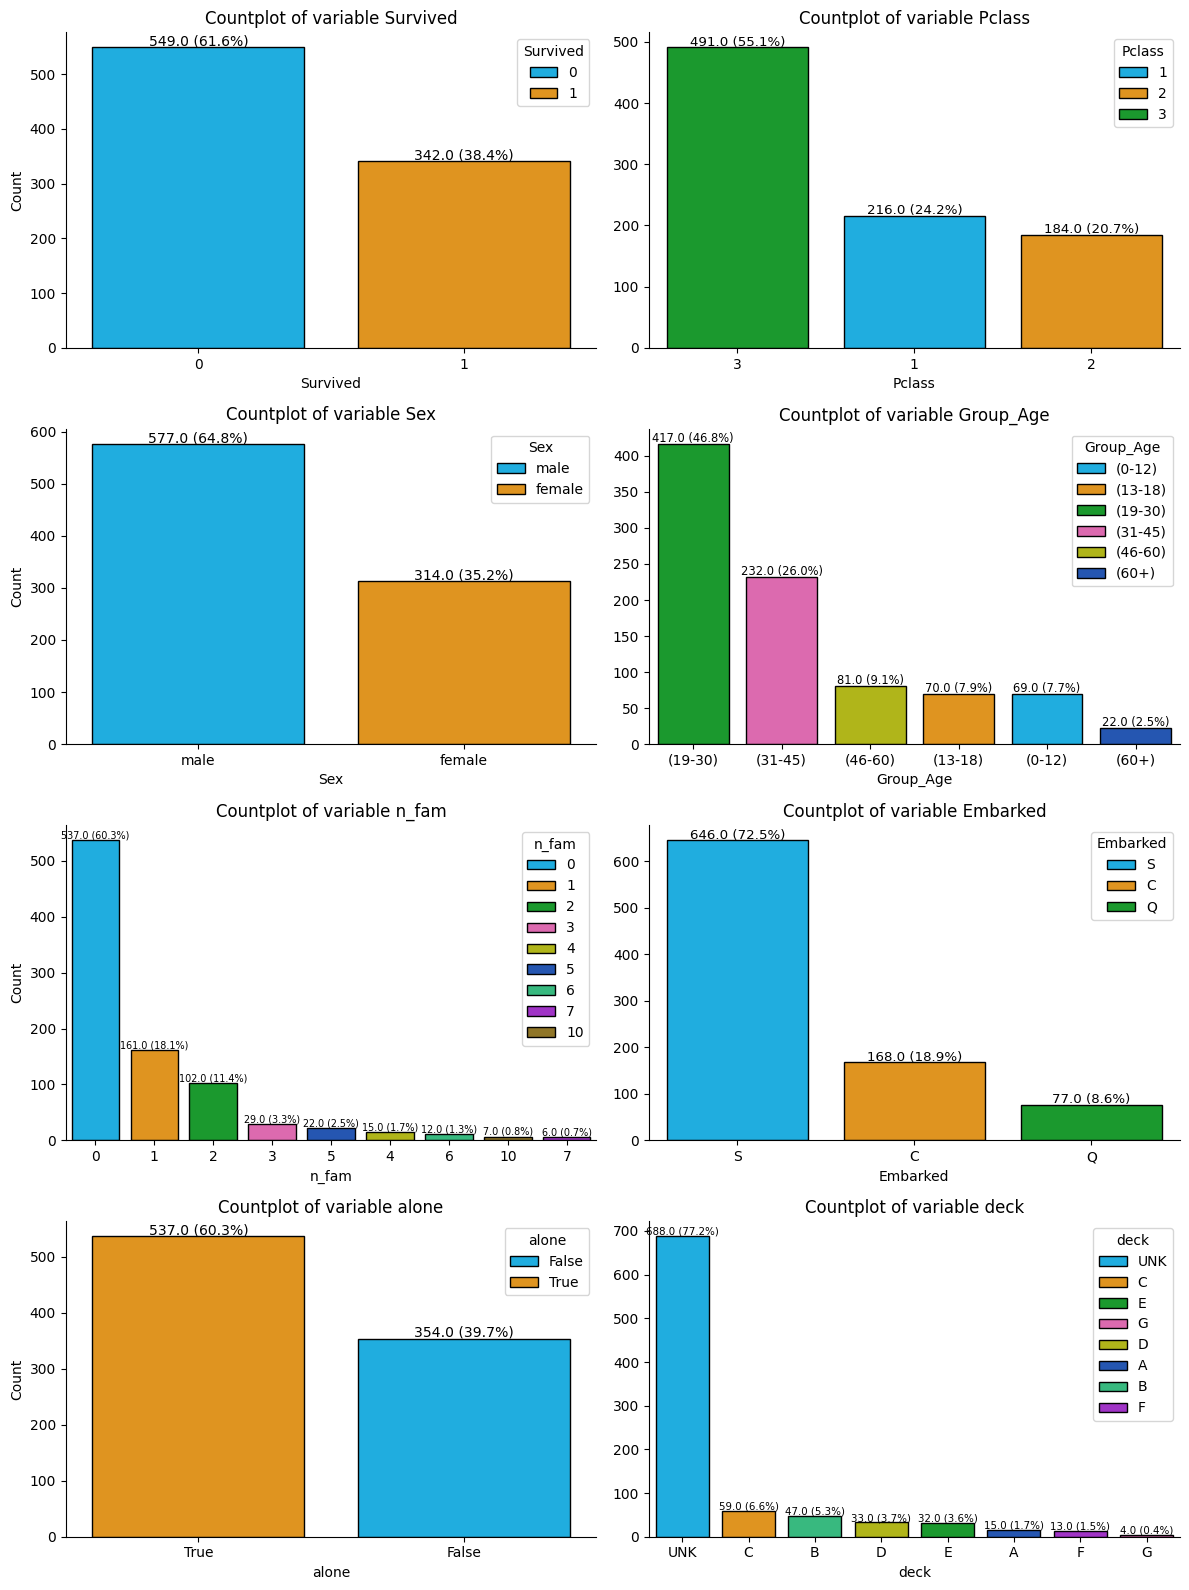

In [38]:
variables = ['Survived', 'Pclass', 'Sex', 'Group_Age', 'n_fam' ,'Embarked', 'alone', 'deck']

f.cathegorical_simple(df = df, variables = variables)


Now, for example, we could look to these distributions within males.

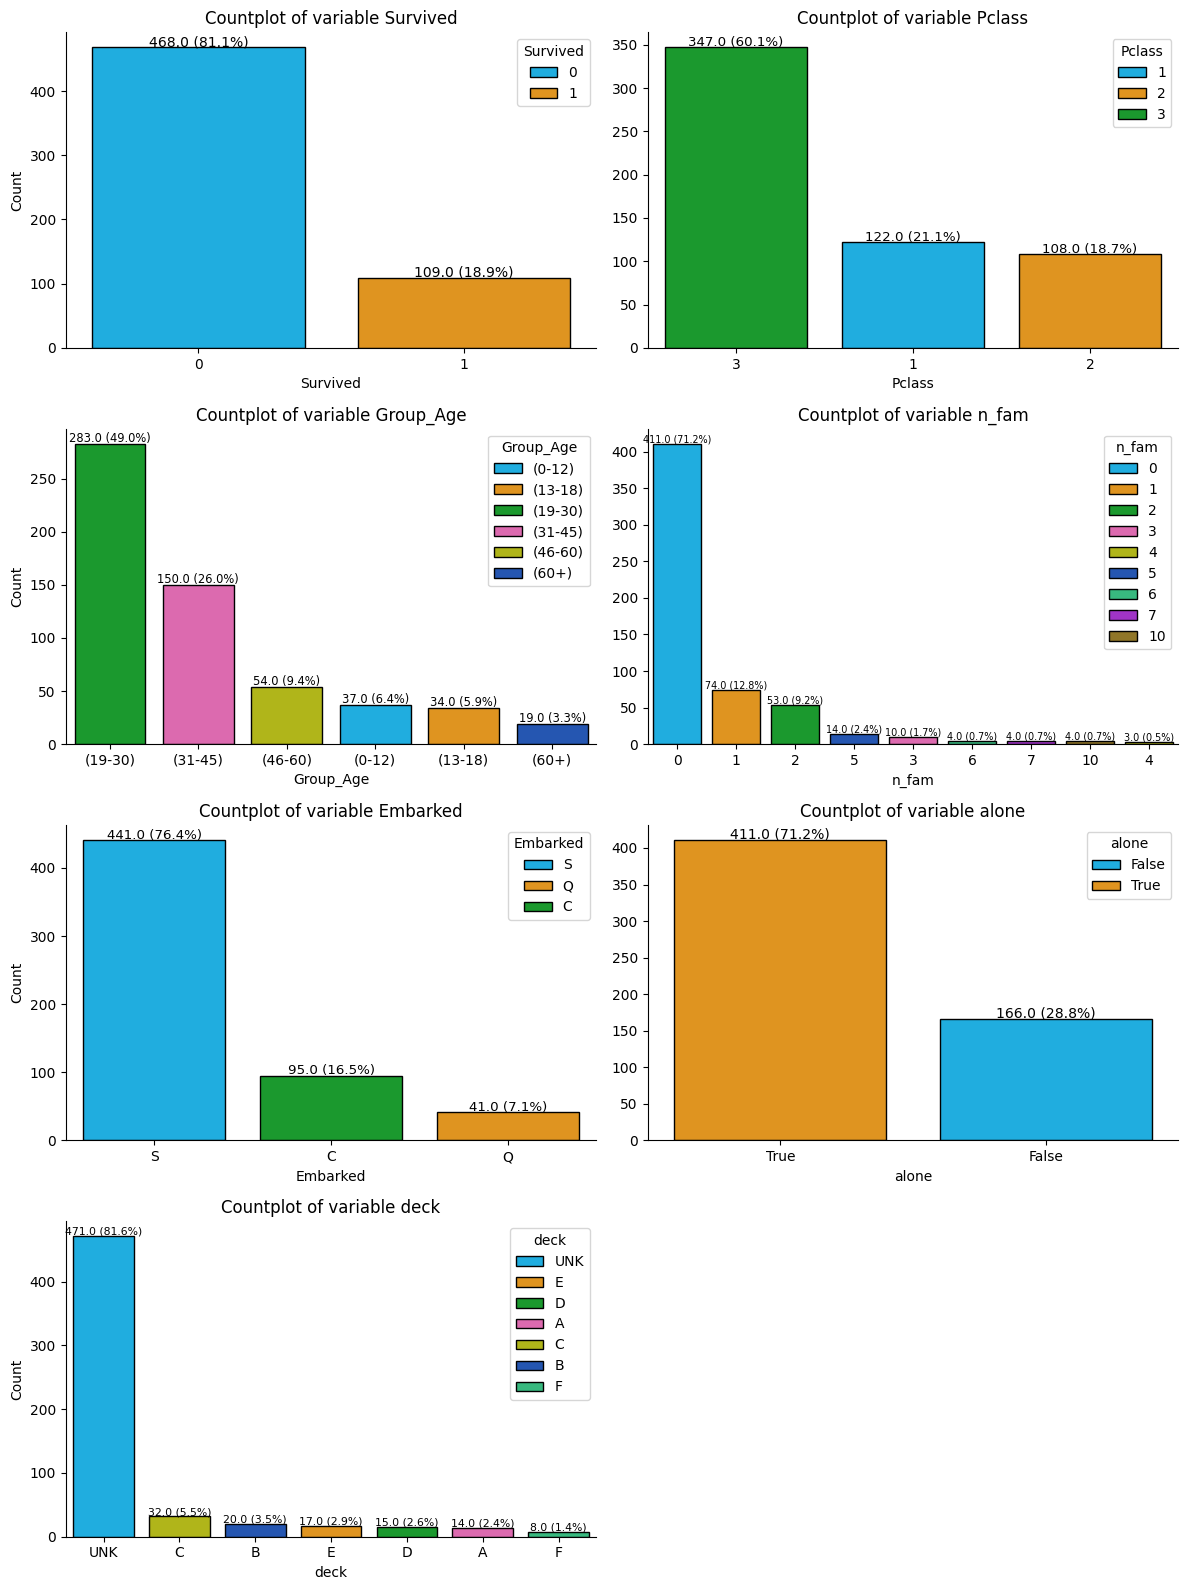

In [39]:
df_male = create_group(df, [('Sex', 'male')])


variables = ['Survived', 'Pclass', 'Group_Age', 'n_fam' ,'Embarked', 'alone', 'deck']

f.cathegorical_simple(df = df_male, variables = variables)

### Numerical variables

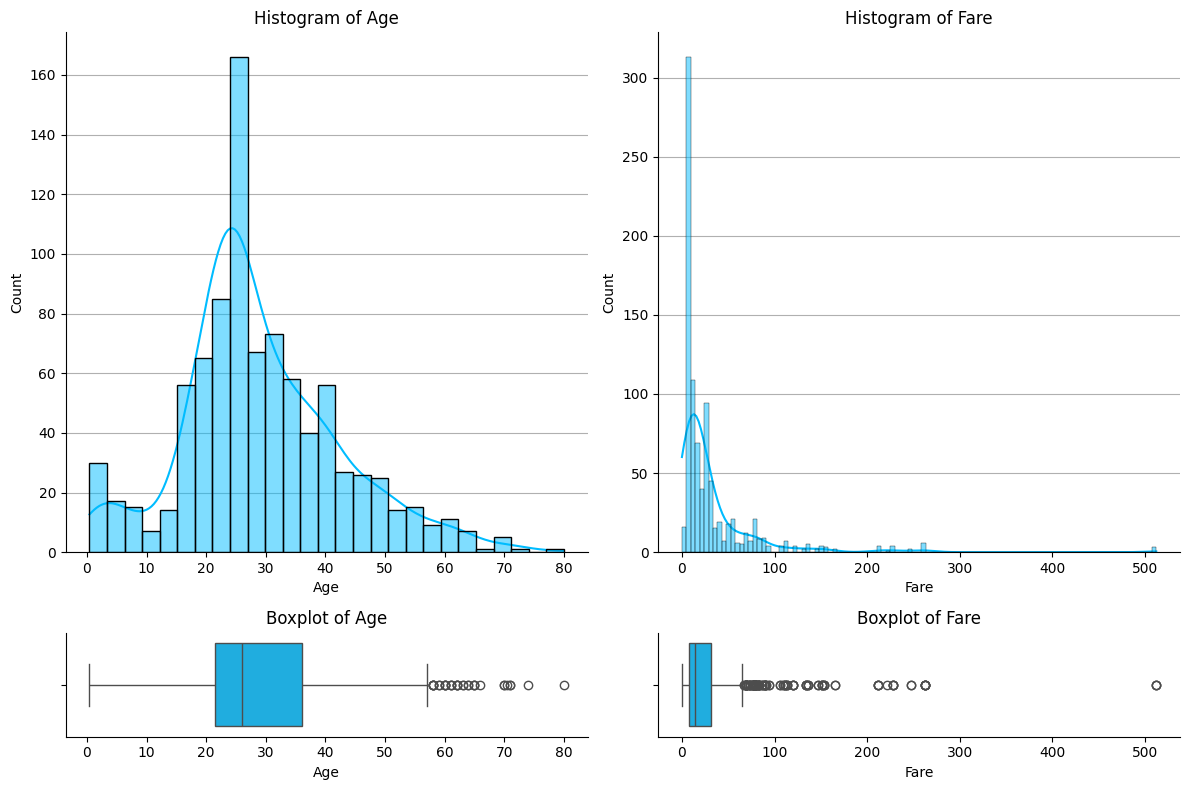

In [40]:
variables = ['Age', 'Fare']
f.numerical_simple(df, variables)

When analyzing the numerical variables in the dataset, we observe that the `Fare` variable exhibits unusual behavior, with extremely high values. These extreme values can be considered outliers and need to be analyzed in more depth to determine their impact on the overall dataset analysis. The presence of these outliers can distort statistical measures and visualizations, so it is crucial to address them appropriately.

## Outlier detection and removal
In this section, we focus on identifying outliers and study the possibility of remove them from the dataset. We will use the **interquartile (IQR)** method to determine the thresholds that will define the outliers. 


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
has_deck,891.0,0.227834,0.419670,0.00,0.0000,0.0000,0.0,1.0000
n_fam,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000
FamilyID,891.0,3.123457,11.609490,-1.00,-1.0000,-1.0000,-1.0,53.0000


First we take a general look. We identify the variables `Fare`, `Age` and `n_fam` as susceptible of having outliers. 
Especially, the `Fare` column shows a great standard deviation (49.7), compared to its mean value (32.2). 
Therefore, we will use a violin plot to better see those variables. 

In [42]:
for var in ['Age', 'Fare', 'n_fam']:
    f.px_violin_simple(df, var)


All these variables may have some outlier values, so we apply the IQR. 

In [43]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df_clean


In [44]:
df_cleanFare = remove_outliers(df, 'Fare')
df_cleanAge = remove_outliers(df, 'Age')
df_cleanNFam = remove_outliers(df, 'n_fam')

In [45]:
df_cleanFare.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,775.0,445.806452,260.116285,1.00,213.5000,450.0,670.5,891.0
Survived,775.0,0.339355,0.473796,0.00,0.0000,0.0,1.0,1.0
Pclass,775.0,2.480000,0.734390,1.00,2.0000,3.0,3.0,3.0
Age,775.0,28.417742,13.065831,0.42,21.5000,25.0,35.0,80.0
SibSp,775.0,0.437419,0.899838,0.00,0.0000,0.0,1.0,5.0
Parch,775.0,0.340645,0.785914,0.00,0.0000,0.0,0.0,6.0
Fare,775.0,17.822091,13.578085,0.00,7.8958,13.0,26.0,65.0
has_deck,775.0,0.145806,0.353140,0.00,0.0000,0.0,0.0,1.0
n_fam,775.0,0.778065,1.416873,0.00,0.0000,0.0,1.0,7.0
FamilyID,775.0,2.349677,10.627243,-1.00,-1.0000,-1.0,-1.0,53.0


In [46]:
df_cleanAge.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,858.0,447.065268,257.903898,1.00,223.2500,445.5,670.75,891.0000
Survived,858.0,0.386946,0.487335,0.00,0.0000,0.0,1.00,1.0000
Pclass,858.0,2.339161,0.822882,1.00,2.0000,3.0,3.00,3.0000
Age,858.0,27.783998,11.621469,0.42,21.5000,25.0,35.00,57.0000
SibSp,858.0,0.536131,1.119145,0.00,0.0000,0.0,1.00,8.0000
Parch,858.0,0.383450,0.806077,0.00,0.0000,0.0,0.00,6.0000
Fare,858.0,31.554224,49.419822,0.00,7.8958,14.4,30.50,512.3292
has_deck,858.0,0.215618,0.411490,0.00,0.0000,0.0,0.00,1.0000
n_fam,858.0,0.919580,1.629459,0.00,0.0000,0.0,1.00,10.0000
FamilyID,858.0,3.216783,11.738083,-1.00,-1.0000,-1.0,-1.00,53.0000


In [47]:
df_cleanNFam.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,800.0,447.681250,255.024600,1.00,228.7500,447.5,667.2500,891.0000
Survived,800.0,0.388750,0.487771,0.00,0.0000,0.0,1.0000,1.0000
Pclass,800.0,2.281250,0.842933,1.00,1.0000,3.0,3.0000,3.0000
Age,800.0,30.294062,12.659203,0.42,22.0000,27.0,37.0000,80.0000
SibSp,800.0,0.265000,0.484839,0.00,0.0000,0.0,0.0000,2.0000
Parch,800.0,0.191250,0.476925,0.00,0.0000,0.0,0.0000,2.0000
Fare,800.0,29.361140,47.214302,0.00,7.8958,13.0,26.6625,512.3292
has_deck,800.0,0.235000,0.424264,0.00,0.0000,0.0,0.0000,1.0000
n_fam,800.0,0.456250,0.709729,0.00,0.0000,0.0,1.0000,2.0000
FamilyID,800.0,2.865000,11.215347,-1.00,-1.0000,-1.0,-1.0000,53.0000


In [48]:
for i in [['Age', df_cleanAge], ['Fare', df_cleanFare], ['n_fam', df_cleanNFam]]:
    f.px_violin_simple(i[1], i[0])


With this method, we have removed 3%, 13% and 10% of the individuals from the dataset for the `Age`, `Fare` and `n_fam` variables respectively. However, we should consider if the outlier removal makes sense with the objective of the study.

Removing outliers from the dataset, particularly for variables such as `Fare`, `Age`, and `n_fam`, may lead to a significant loss of valuable information that is crucial for the study of survival rates among Titanic passengers. These extreme values correspond to very wealthy individuals (high `Fare`), very old or young passengers (high or low `Age`), or those with a large number of family members on board (high `n_fam`). Each of these groups represents unique and important segments of the population that could have distinct survival patterns. Wealthy passengers, for instance, might have had better access to lifeboats, while older individuals and those with many family members might have faced different survival challenges. By excluding these outliers, we risk overlooking critical insights into how these factors influenced survival rates, thereby compromising the comprehensiveness and accuracy of our analysis. Therefore, it is essential to retain these outliers to ensure that our study captures the full spectrum of passenger experiences and outcomes.

## Bivariate Analysis

In this section, we perform bivariate analysis on the dataset. The main steps include:

- **Categorical Pairs**:
    - We analyze the relationships between pairs of categorical variables.
    - We are importing the function `cathegorical_pairs` to construct the plots.

- **Numerical Pairs**:
    - We analyze the relationships between pairs of numerical variables.
    - We are importing the function `numerical_pairs` to construct the plots.

- **Mixed Pairs**:
    - We analyze the relationships between numerical and categorical variables.
    - We are importing the function `mixed_pairs` to construct the plots.


### Cathegorical pairs

We plot all the combinations that may be valuable and informative. 

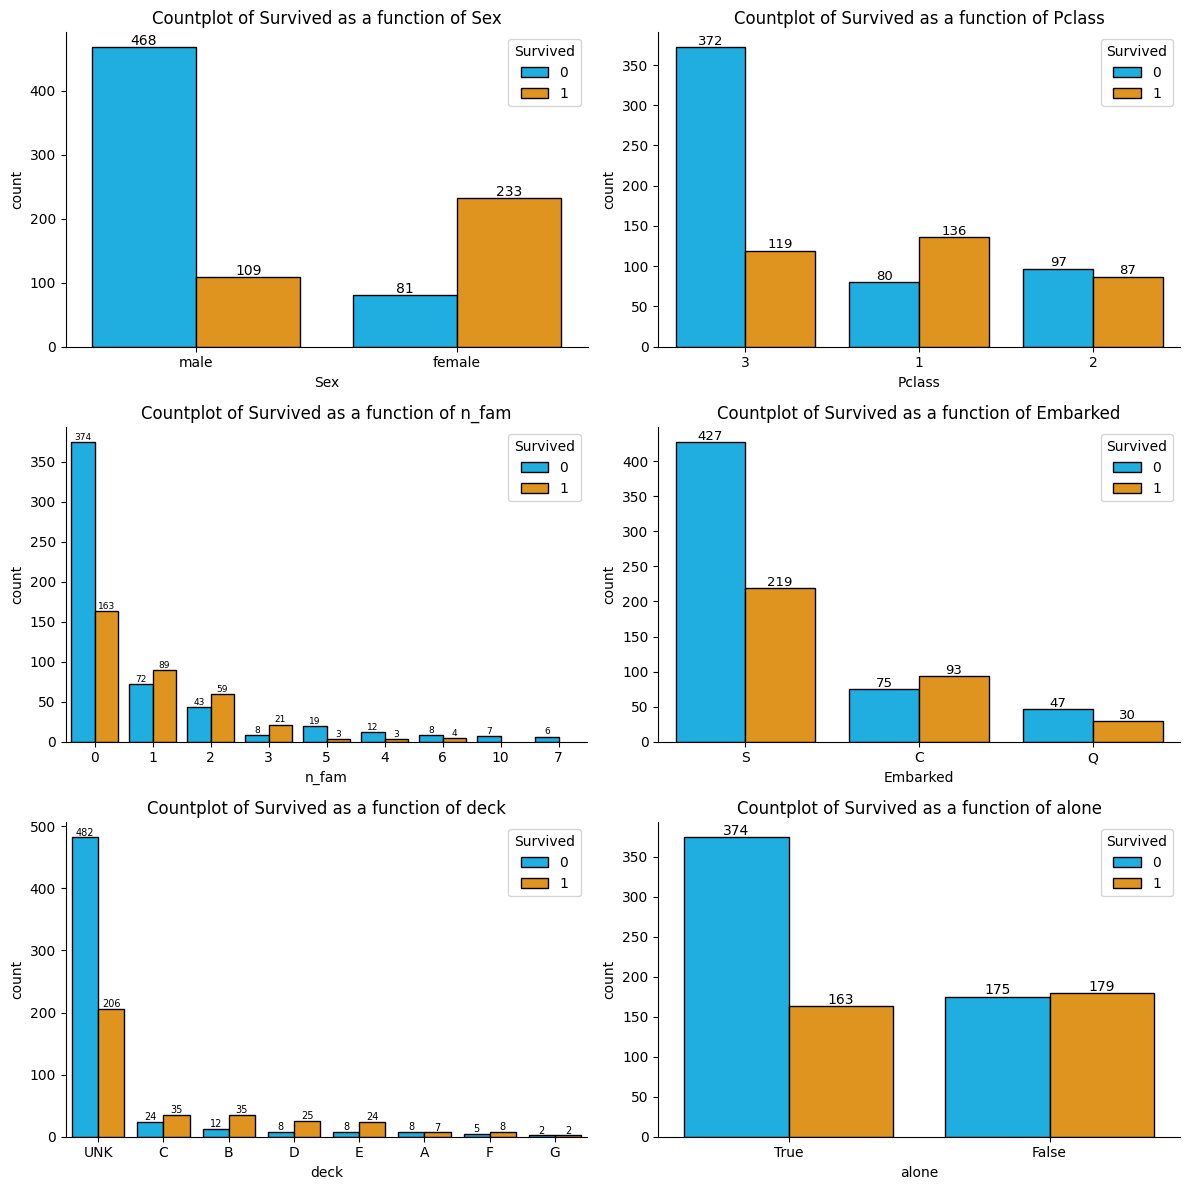

In [49]:
# Plotting all variables (ind) against Survived (dep)

ind_variables = ['Sex', 'Pclass','n_fam', 'Embarked', 'deck', 'alone']
dep_variable = 'Survived'

f.cathegorical_pairs(df, dep_variable, ind_variables)

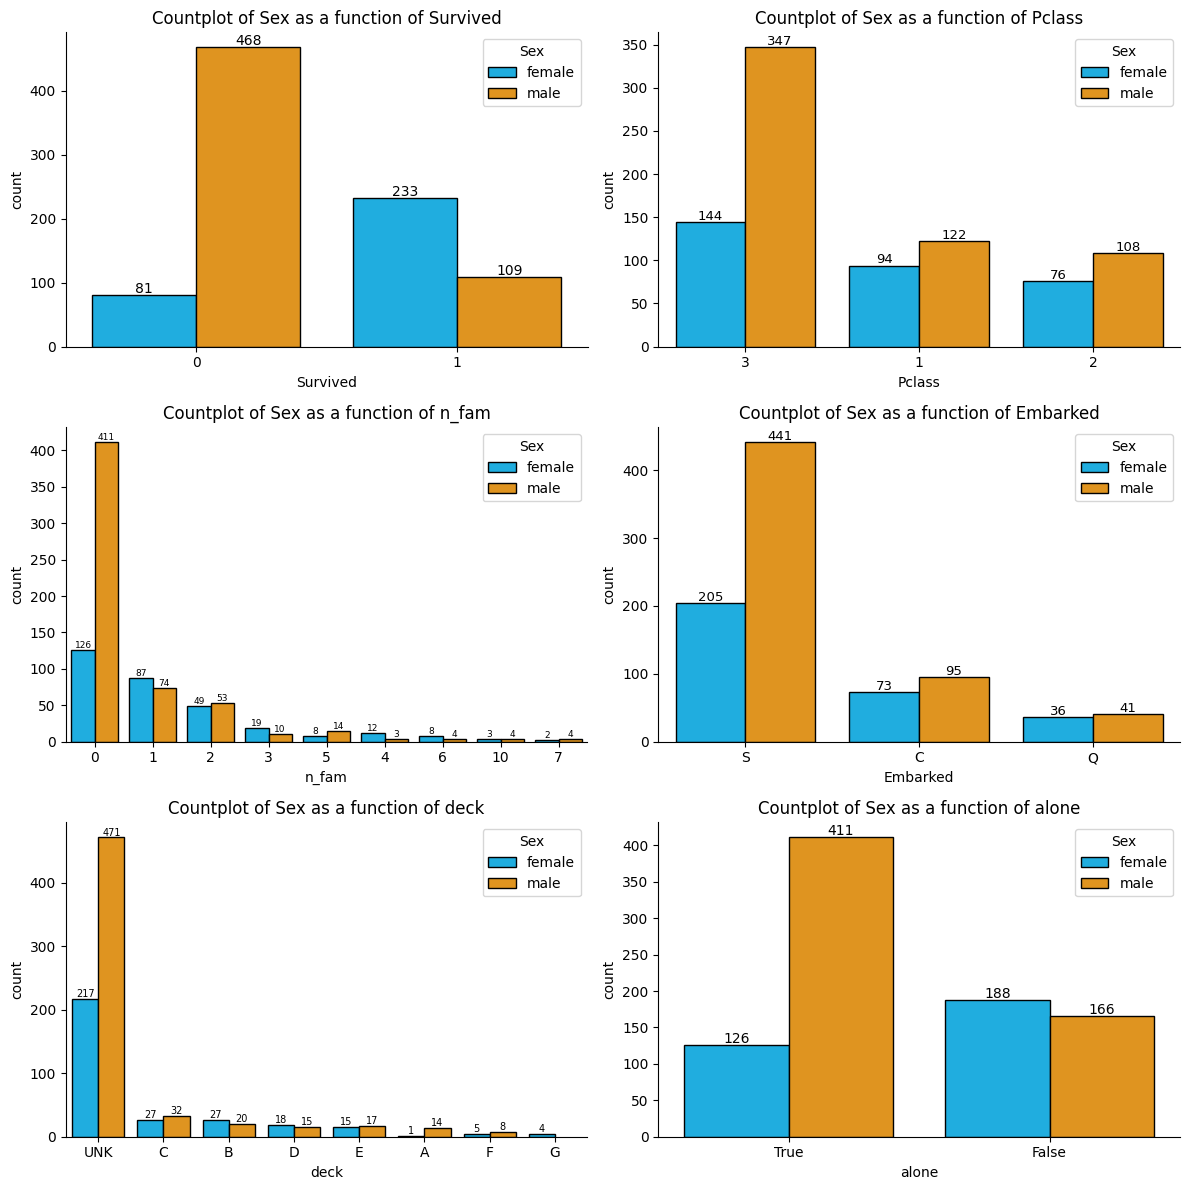

In [50]:
# Plotting all variables against Sex

dep_variables = ['Survived', 'Pclass', 'n_fam', 'Embarked', 'deck', 'alone']
ind_variable = 'Sex'

f.cathegorical_pairs(df, ind_variable, dep_variables)

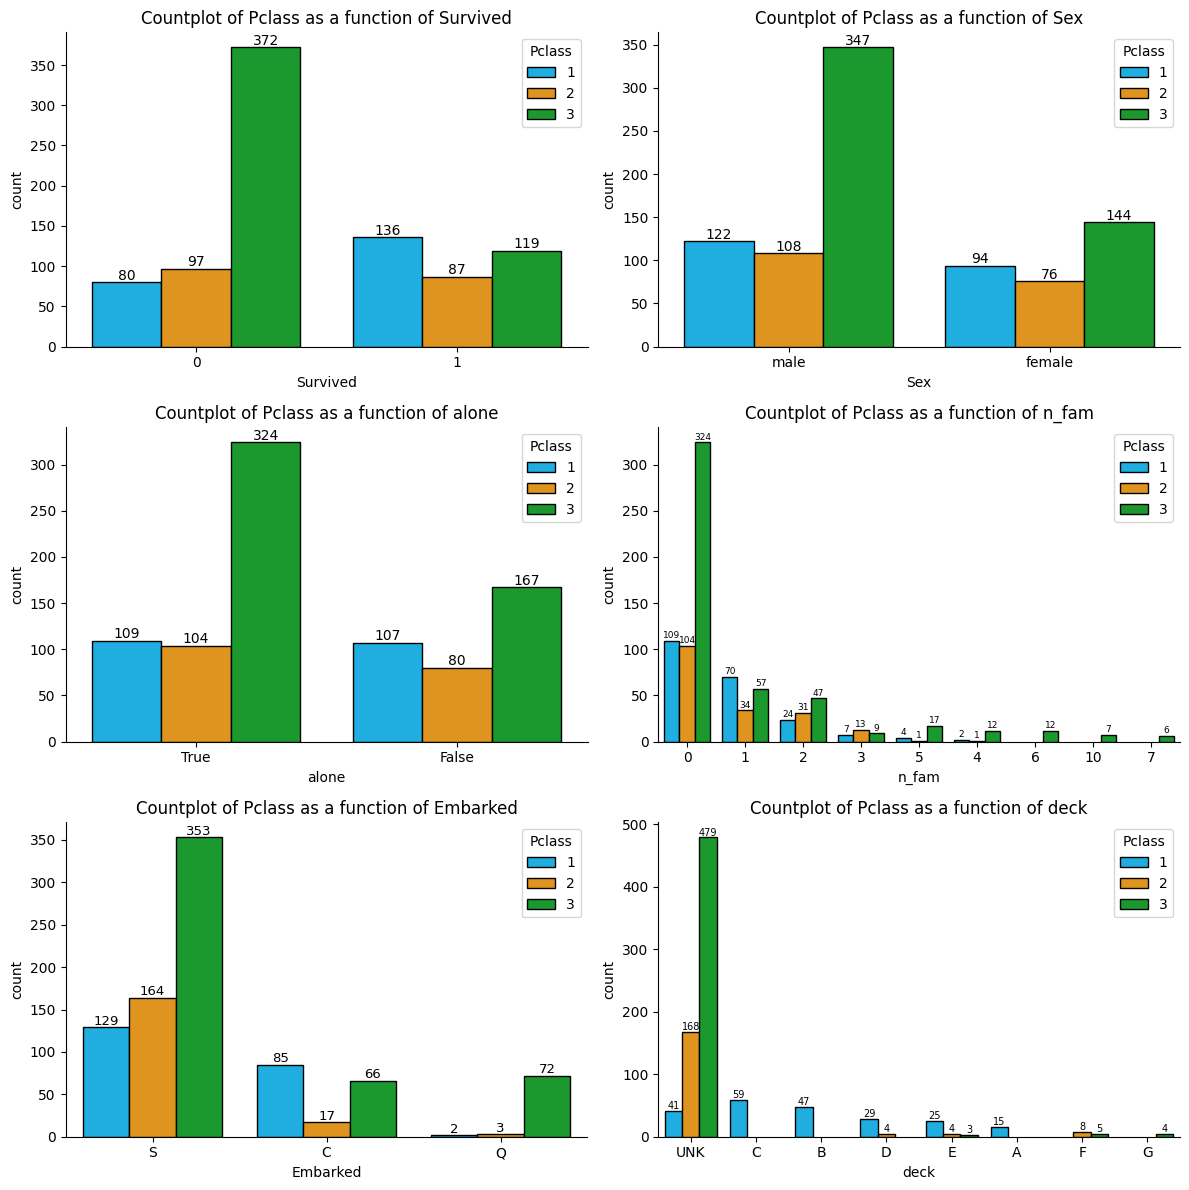

In [51]:
# Plotting all variables against Pclass

dep_variables = ['Survived', 'Sex', 'alone', 'n_fam', 'Embarked', 'deck']
ind_variable = 'Pclass'

f.cathegorical_pairs(df, ind_variable, dep_variables)

**Analysis summary**:
  
The analysis of this section reveals a significant group of individuals who share the following characteristics:
- Gender: Male
- Class: Third class
- Traveling alone
- No assigned cabin
- Embarked at Southampton
- Did not survive

This group is notably larger than other groups with different conditions. Therefore, we could investigate this group more deeply.

In [95]:
df_young_m = create_group(df, [('Group_Age', '(19-30)'), ('Pclass', 3), ('alone', True), ('Survived', 0)])


In [96]:
len(df_young_m)

176

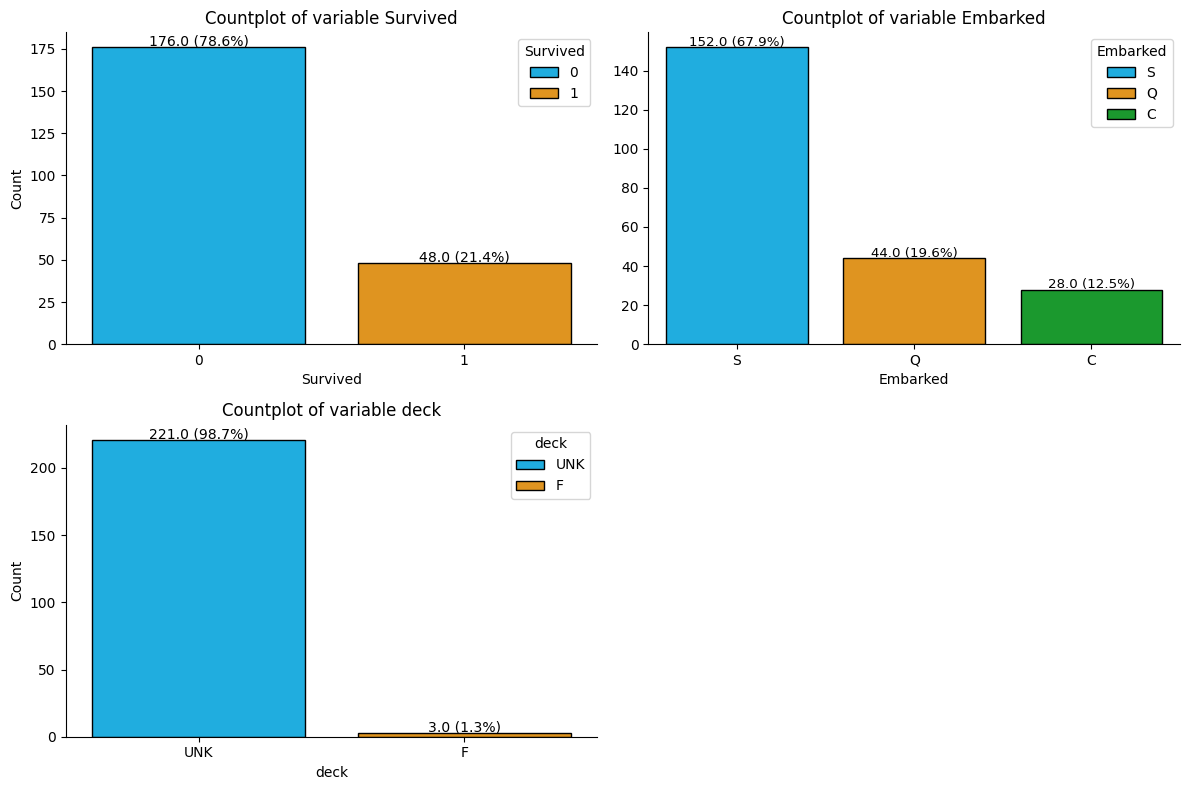

In [52]:
#Analyze the group of young males in third class that travalled alone
df_young_m = create_group(df, [('Group_Age', '(19-30)'), ('Pclass', 3), ('alone', True)])

df_young_m
f.cathegorical_simple(df = df_young_m, variables = ['Survived', 'Embarked', 'deck'])


With this simple procedure, we have found that this group had a very low survival rate (21.4%), and that most had an unknown deck. 

### Numerical pairs

Now we represent the two numerical variables: `Age` and `Fare` 

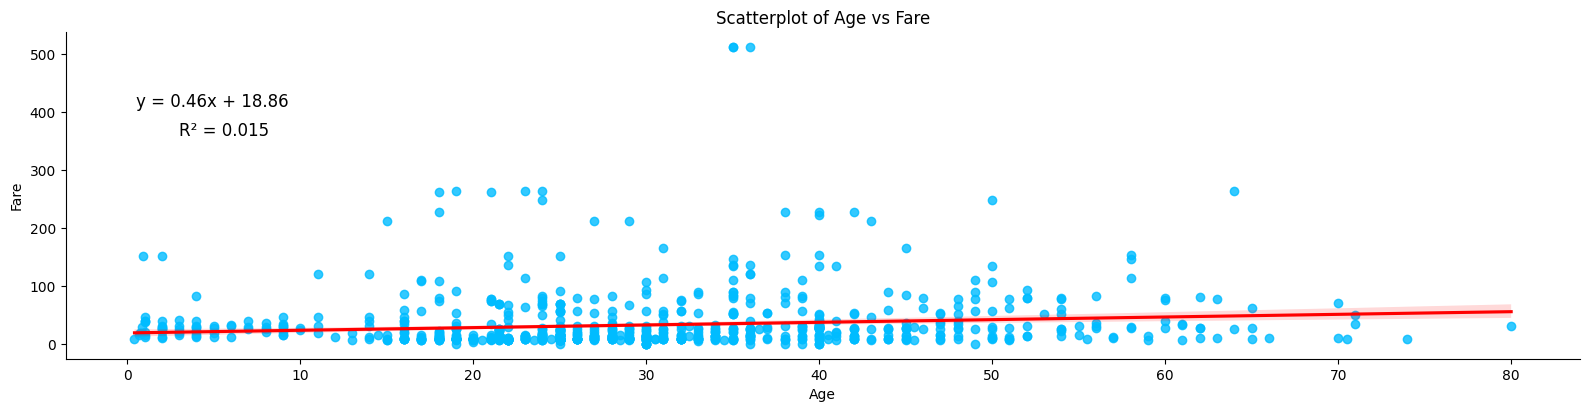

In [53]:
#Compare Age vs Fare with the initial dataset

f.numerical_pairs(df = df, x_var = 'Age', y_var = 'Fare')


The analysis of the numerical pairs shows a subtle positive correlation between `Fare` and `Age`. However, the R squared value from the linear regression of both variables indicates that the relationship is almost inexistent.

### Mixed pairs

Now, several pairs between a cathegorical variable and a numerical variables are made to continue the analysis.

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'alone', 'deck',
       'Group_Age', 'has_deck', 'Surname', 'Title', 'n_fam', 'FamilyID',
       'Family_Survival_Rate'],
      dtype='object')

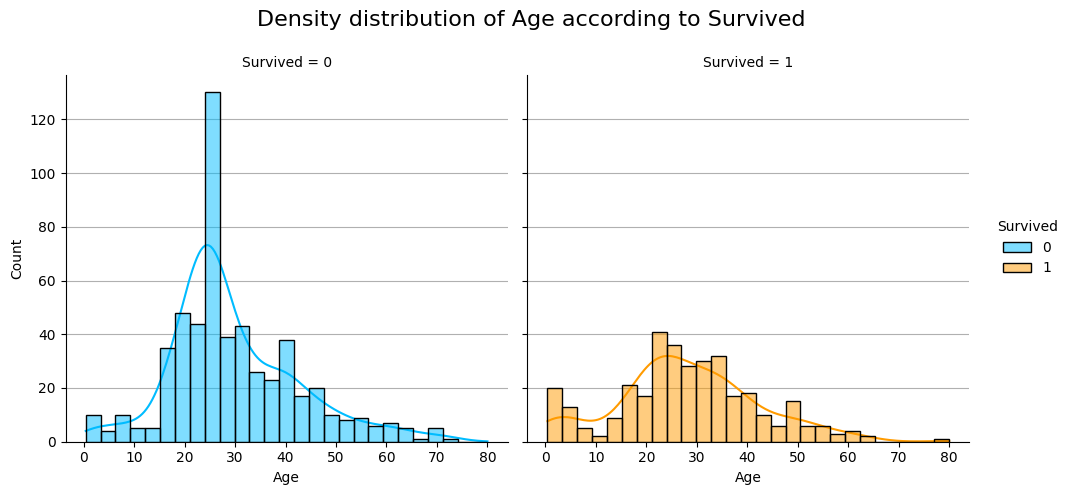

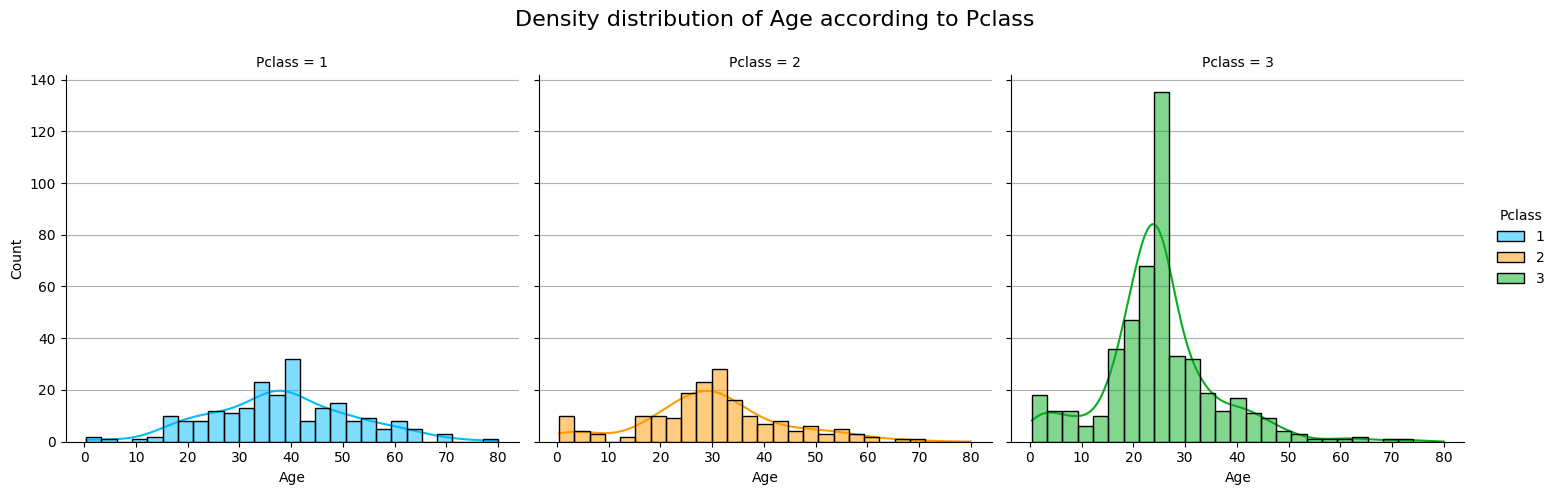

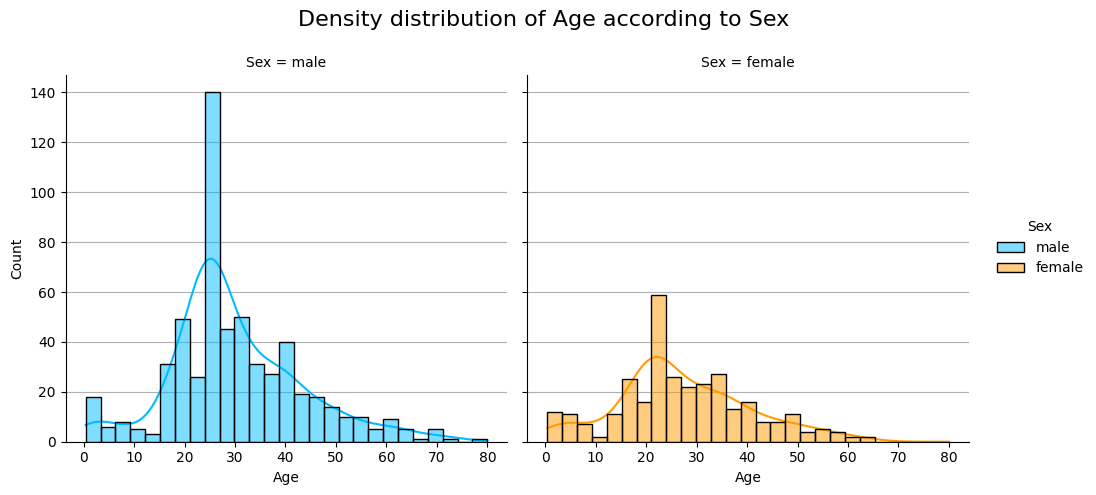

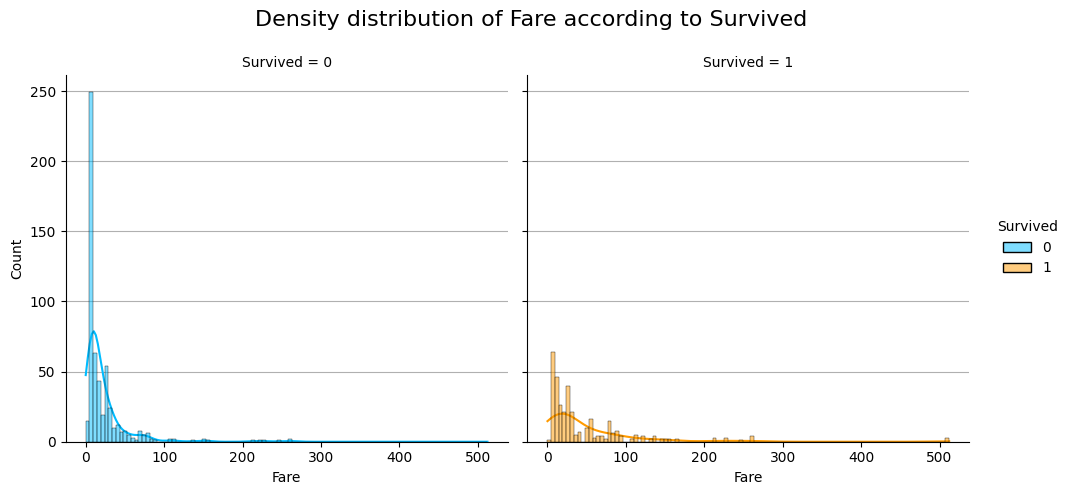

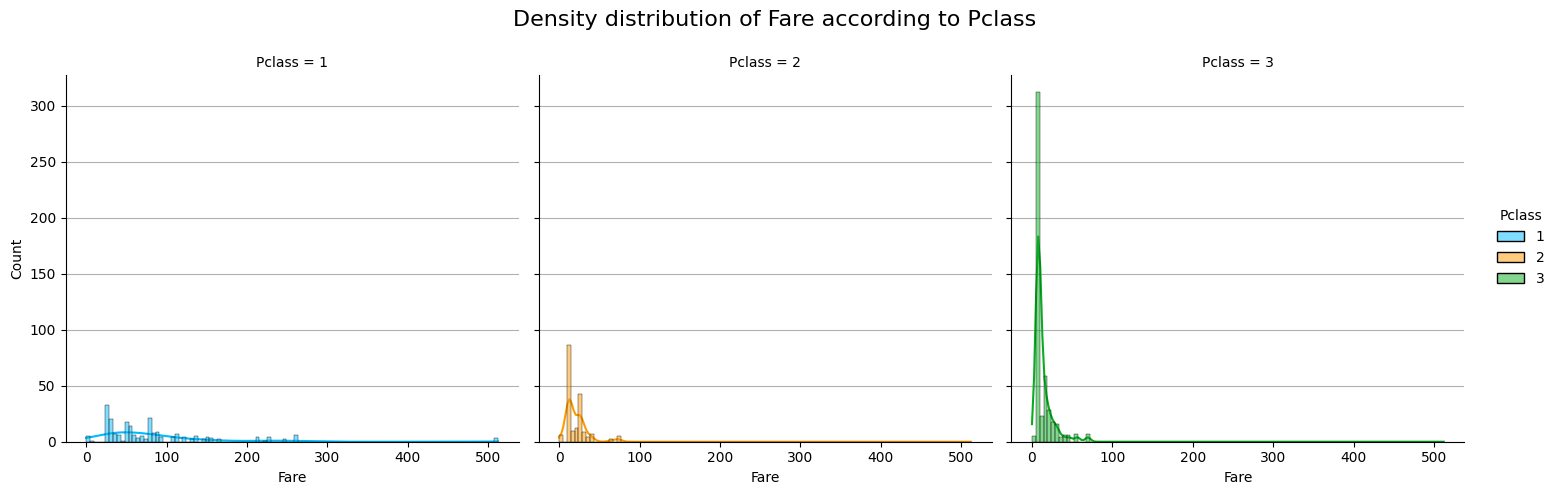

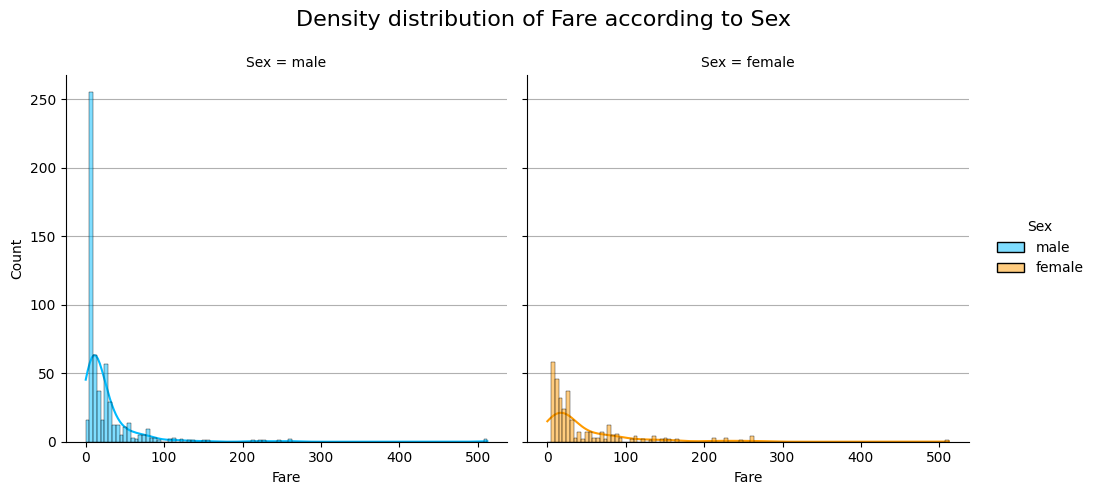

In [55]:
cath_variables = ['Survived', 'Pclass', 'Sex']

num_variables = ['Age', 'Fare']

for num in num_variables:
    for cath in cath_variables:
        f.mixed_pairs(df, num, cath)

With this plots, we can study the relations between any numerical and cathegorical variables. As always, we could also select a specific group of passengers. 

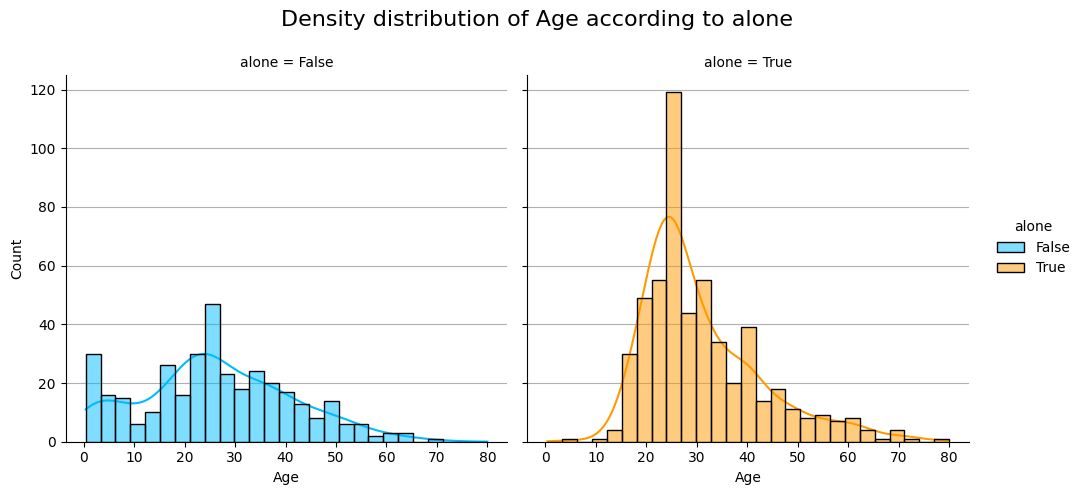

In [56]:
#Age/surivived
f.mixed_pairs(df = df, num_var = 'Age', cath_var = 'alone')

Here, we see again that there is a group of individuals significantly larger than the rest, difficult to be product of a normal random distribution. We must follow the analysis in order to obtain reasoned conclusions.    

## Multivariate Analysis

In this section, we perform multivariate analysis on the Titanic dataset. The main steps include:

- **Trios Analysis**:
    - We analyze the relationships between three variables simultaneously to uncover more complex interactions.
    - Visualizations are created to understand how numerical variables vary across different categories and subcategories.
    - We are importing the function `mixed_trios` to construct the plots.

- **Correlation Matrices**:
    - We calculate and visualize the correlation matrices for numerical and encoded categorical variables.
    - This helps in identifying the strength and direction of relationships between variables.
    - We are importing the function `corr_matrix` to construct the plots.


### Trios Analysis

Here, one must see which combinations of variables are interesting and may give information. We have chosen to represent the trios of variables:

- `Age`, `Survived` and `Sex`.
- `Age`, `Survived` and `Pclass`.
- `Age`, `Sex` and `Pclass`.
- `Fare`, `Survived` and `Pclass`.
- `Fare`, `Survived` and `Sex`.


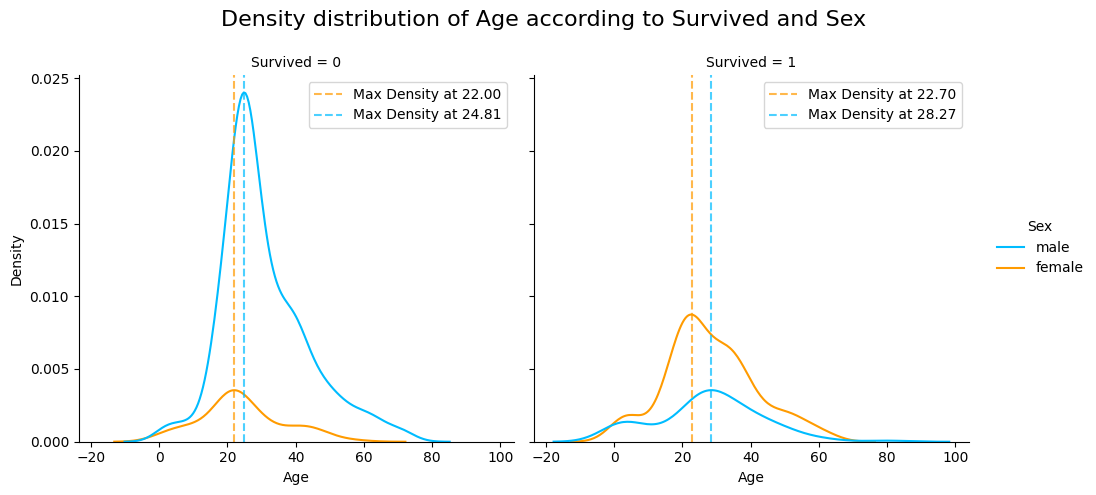

In [57]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Survived', cath_intra='Sex')


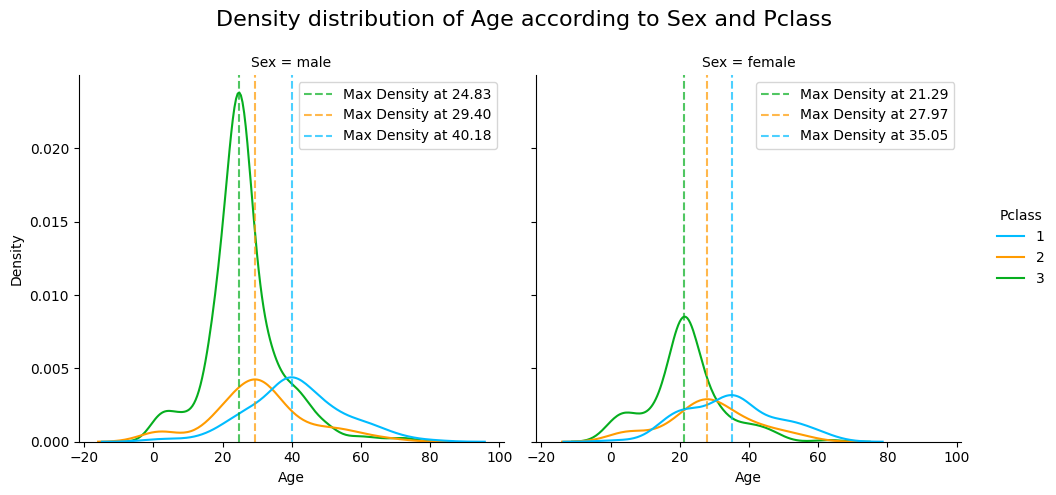

In [58]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Sex', cath_intra='Pclass')


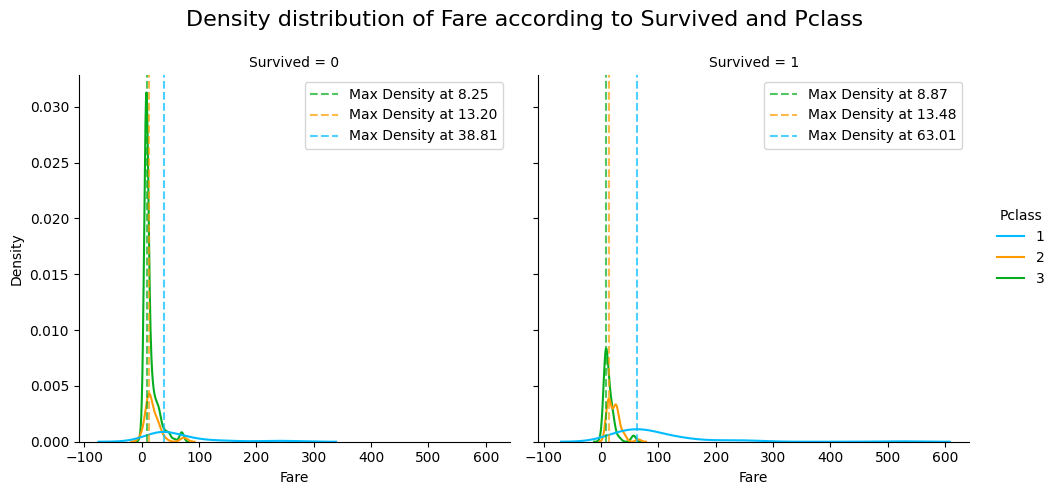

In [59]:
f.mixed_trios(df = df, num_var='Fare', cath_inter = 'Survived', cath_intra='Pclass')


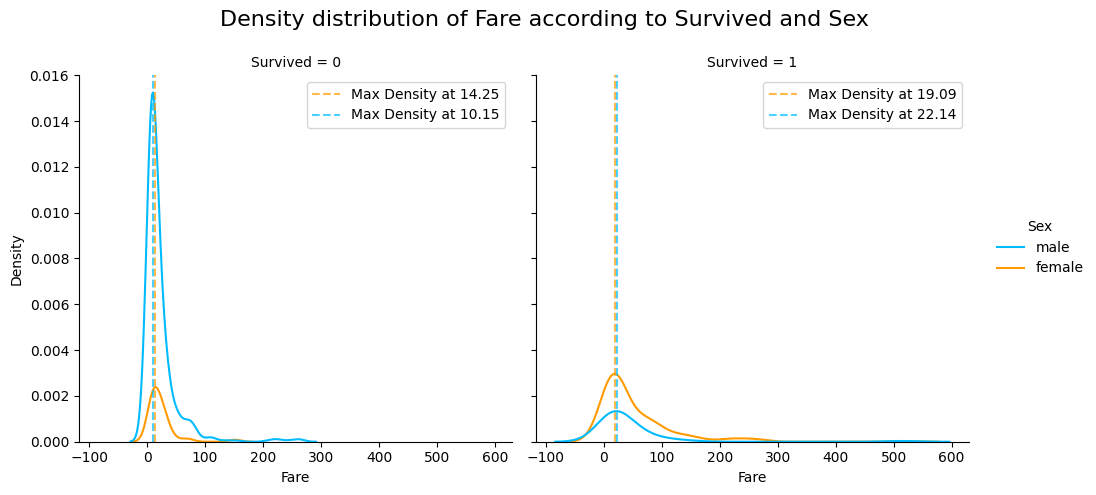

In [60]:
f.mixed_trios(df = df, num_var='Fare', cath_inter = 'Survived', cath_intra='Sex')


In [61]:
#With this function we can see the distribution of the numerical variables in the dataset in an interactive way
f.px_violin_multiple(df, y="Age", x="Survived", color="Sex")

The Trios Analysis section has given us a set of clear and detailed plots that help us explore the relationships between different variables and groups of people on the Titanic. These visualizations reveal patterns and connections that might not be obvious from just looking at the raw data. With these plots, we can see how factors like age, fare, and family size affected survival rates, and how these effects differed among various groups. This analysis helps us better understand what influenced the survival chances of the Titanic passengers, adding valuable insights to our study.

### Correlation matrixes

In this, we compute and visualize the correlation matrix to examine the relationships between different variables in our dataset. Before representing correlation matrices, we must convert categorical variables like `Sex` and `Embarked` into numeric format using one-hot encoding. This step is crucial for accurate correlation calculations. After these conversions, we can compute and visualize the correlation matrix to understand the relationships between different variables in our dataset.

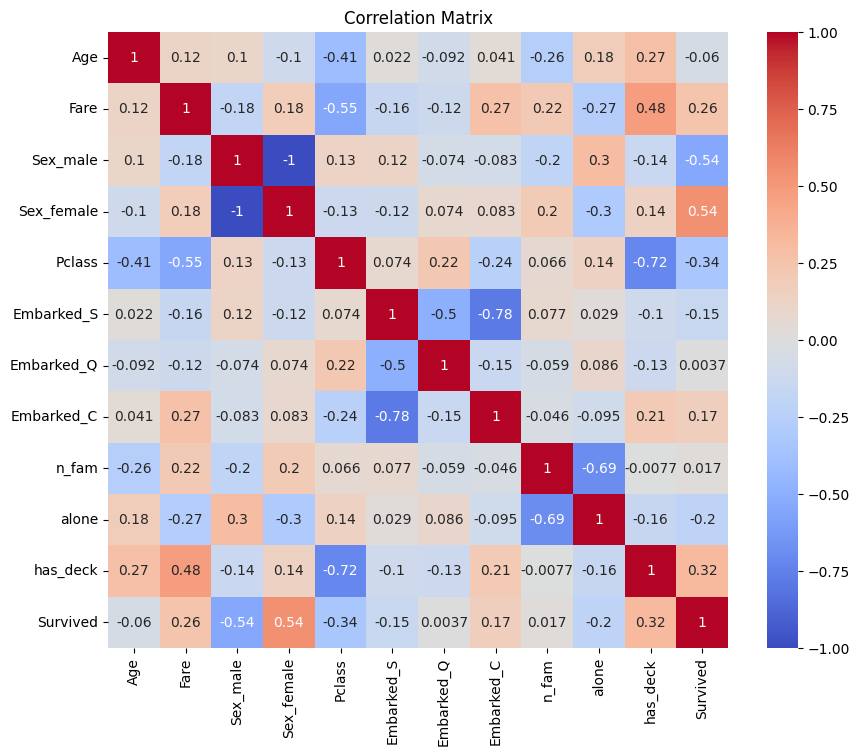

In [62]:
#Default columns: corr_columns=["Age", "Fare", "Sex_male", "Sex_female", "Pclass", 
#                                 "Embarked_S", "Embarked_Q", "Embarked_C", 'n_fam', 'alone', 'has_deck', "Survived"]

f.corr_matrix(df_encoded, palette = 'coolwarm')

We can also create a heatmap out of different sub-sections of the dataframe, in order to study more in detail a given social group.

For example, we can perform a heatmap with the passengers that were not alone in the ship, or with all men that were alone in the third class.

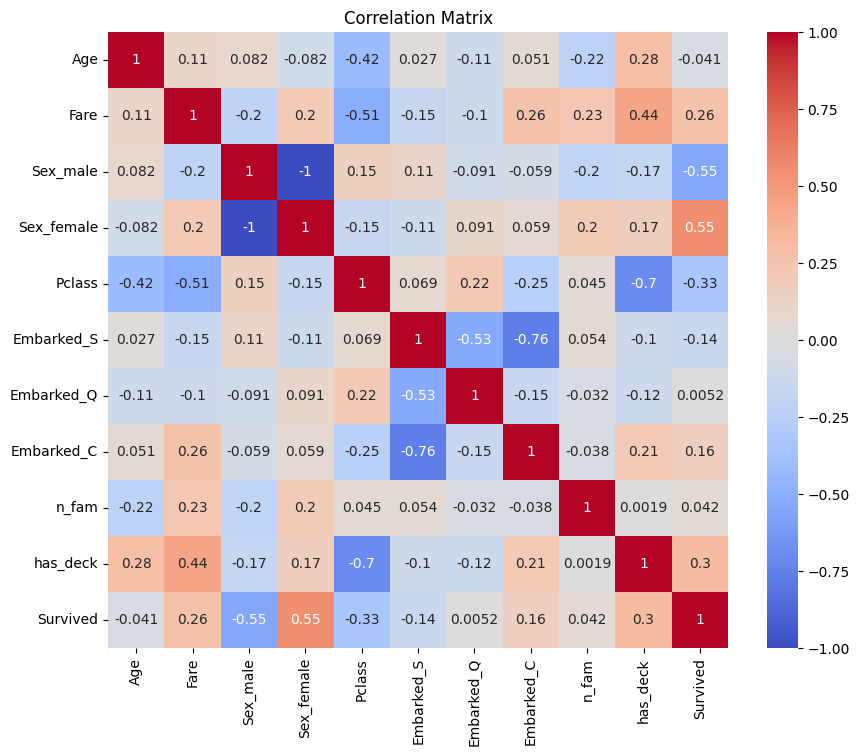

In [74]:
corr_columns=["Age", "Fare", "Sex_male", "Sex_female", "Pclass", 
                                "Embarked_S", "Embarked_Q", "Embarked_C", 'n_fam', 'has_deck', "Survived"]

df_families = create_group(df_encoded, [('FamilyID', -1)])
f.corr_matrix(df_families, corr_columns=corr_columns)


# Interactive space

Lastly, this feature allows you to see and create social groups based on different variables, and see how many passengers were in each group. This allows a rapid visualization and understanding of the distribution of passengers amoong social groups. This may help to quickly identify which social groups are more abbundant and worth studying.  

In [64]:

# To clarify the subsequent visualization, we will change values like 0 and 1 in Survived to No and Yes
df_plot = df.copy()

df_plot['Survived'] = df_plot['Survived'].replace({0: 'No', 1: 'Yes'})
df_plot['Pclass'] = df_plot['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'})

#make the Age column categorical
df_plot['Group_Age'] = pd.cut(df_plot['Age'], bins=[0, 12, 18, 30, 45, 60, 120], 
                        labels=['Infants (0-12)', 'Teens (13-18)', 'Young Adults (19-30)', 'Adults (31-45)', 'Middle Age (46-60)', 'Elderly (60+)'],
                        right=True)

In [75]:
##Choose the variables to be displayed in the app
grouping_variables = ['Survived', 'Group_Age', 'Pclass', 'Embarked', 'Sex', 'deck', 'FamilyID']


In [83]:
#Create the interactive space

# Inicializar la app Dash
app = dash.Dash(__name__)

# Definir el layout de la app
app.layout = html.Div([
    html.H1('Interactive Titanic Data Visualization', style={'textAlign': 'center', 'color': 'white', 'font-size': 24}),
    html.Div([
        html.Label('Group by:'),
        dcc.Dropdown(
            id='grouping-dropdown',
            options=[{'label': var, 'value': var} for var in grouping_variables],
            value=[],
            multi=True,
            placeholder='Select variables to group by'
        )
    ], style={'width': '500px', 'margin-bottom': '0px'}),
    html.Div(id='group-counts', style={'margin-bottom': '0px'}),
    dcc.Graph(id='scatter-plot')
])

# Generar posiciones de los puntos en un cluster
def generate_cluster_positions(center_x, center_y, n_points):
    """Genera posiciones aleatorias alrededor de un centro dado para los puntos en un cluster"""
    angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
    radii = np.random.uniform(0, 1, size=n_points)  # Generar radios aleatorios
    x_offsets = radii * np.cos(angles)
    y_offsets = radii * np.sin(angles)
    return center_x + x_offsets, center_y + y_offsets

# Callback para actualizar la gráfica y los conteos
@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('group-counts', 'children')],
    [Input('grouping-dropdown', 'value')]
)
def update_figure(selected_vars):
    # Si se seleccionan variables categóricas, crear clusters
    if selected_vars:
        df_plot['Group'] = df_plot[selected_vars].astype(str).agg('-'.join, axis=1)
    else:
        df_plot['Group'] = 'All Passengers'

    groups = df_plot['Group'].value_counts().index.tolist()
    
    fig = go.Figure()
    group_counts = []

    # Definir parámetros para la disposición en filas y columnas
    max_clusters_per_row = 5
    row_height = 5  # Espacio vertical entre filas
    cluster_spacing_x = 5  # Espacio horizontal entre clusters

    max_row = len(groups) // max_clusters_per_row
    # Generar un cluster para cada grupo
    for i, group in enumerate(groups):
        
        group_df_plot = df_plot[df_plot['Group'] == group]
        n_points = len(group_df_plot)
        
        per_points = round((n_points / len(df_plot)) * 100, 2)

        # Calcular el centro del cluster basado en la fila y la columna
        row = i // max_clusters_per_row  # Definir la fila (empezando por 0)
        col = i % max_clusters_per_row   # Definir la columna (de 0 a max_clusters_per_row-1)

        center_x = col * cluster_spacing_x  # Separar los clusters en la fila
        center_y = -row * row_height        # Cada fila tendrá una altura diferente
        
        #definir la distancia de las etiquetas de grupo y numero de individuos en funcion de la fila
        if row == 0:
            pos = 1.3
        elif row == 1:
            pos = 1.8
        elif row == 2:
            pos = 2.5
        elif row == 3:
            pos = 3
        elif row == 4:
            pos = 3.5
        else:
            pos = 4

        # Generar posiciones para los puntos del cluster
        x_positions, y_positions = generate_cluster_positions(center_x, center_y, n_points)

        # Obtener información para el hover
        hover_data = group_df_plot[['Name', 'Survived', 'Sex', 'Age', 'Fare', 'Pclass', 'Embarked', 'deck', 'n_fam', 'FamilyID', 'Family_Survival_Rate']].to_dict('records')
        hover_text = [
            f"Name: {d['Name']}<br>Survived: {d['Survived']}<br>Sex: {d['Sex']}<br>Age: {d['Age']}<br>Fare: {d['Fare']}<br>Pclass: {d['Pclass']}<br>Embarked: {d['Embarked']}<br>Deck: {d['deck']}<br>n_fam: {d['n_fam']}<br>FamilyID: {d['FamilyID']}<br>Family Survival Rate: {d['Family_Survival_Rate']}"
            for d in hover_data
        ]
        fig.add_trace(go.Scatter(
            x=x_positions,
            y=y_positions,
            mode='markers',
            marker=dict(size=4),
            name=group,
            text=hover_text,
            hoverinfo='text'
        ))

        # Añadir el número de individuos en cada grupo
        fig.add_trace(go.Scatter(
            x=[center_x],
            y=[center_y - (0.2 + pos)],            # Posicionar el texto debajo del cluster
            text=[f'{n_points} ({per_points}%) <br>{group}'],  
            mode='text',
            textfont=dict(color='white', size=12-(pos*0.7)),  # Usar el color blanco para el texto
            showlegend=True, 
             name=f'{n_points}'  # Hacer que el texto sea visible solo cuando el grupo es visible
        ))

        # Ajustar diseño de la gráfica
        fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        title={
            'text': 'Interactive Categorical Grouping of Titanic Passengers',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        legend_title='Group',
        template='plotly_dark'  # Set the theme here
        )


    if selected_vars == []:
        label = 'Index'
    else:
        label = ' + '.join(selected_vars)

    # Ajustar diseño de la gráfica
    fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        title='Interactive Categorical Grouping of Titanic Passengers',
        legend_title=f'{label}',
    )
    
    # Save the plot as an HTML file
    # fig.write_html("titanic_clusters_plot.html") 

    return fig, html.Ul([html.Li(count) for count in group_counts])

# Ejecutar la app
if __name__ == '__main__':
    app.run_server(debug=True)


# Conclusion

In conclusion, the analysis conducted throughout this notebook has unveiled critical insights, factors, and tendencies within the Titanic dataset. By examining various variables and their interactions, we have identified significant patterns, such as the large social group characterized by being male, traveling in third class, traveling alone, and not surviving, which contains almost 20% of all passengers. 

This analysis framework is highly customizable, allowing for flexible and versatile exploration of different aspects of the data. The ability to adapt and refine the analysis ensures that we can continue to uncover deeper insights and understand the underlying dynamics that influenced the survival outcomes of the Titanic passengers.

